In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Flight_Booking.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.shape

(300153, 12)

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.shape

(300153, 11)

In [ ]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  str    
 1   flight            300153 non-null  str    
 2   source_city       300153 non-null  str    
 3   departure_time    300153 non-null  str    
 4   stops             300153 non-null  str    
 5   arrival_time      300153 non-null  str    
 6   destination_city  300153 non-null  str    
 7   class             300153 non-null  str    
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), str(8)
memory usage: 25.2 MB


In [ ]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(531)

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(299622, 11)

In [ ]:
df.describe()

,duration,days_left,price
count,299622.000000,299622.000000,299622.000000
mean,12.236543,25.997951,20919.793640
std,7.188274,13.560089,22706.397017
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4789.000000
50%,11.250000,26.000000,7426.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


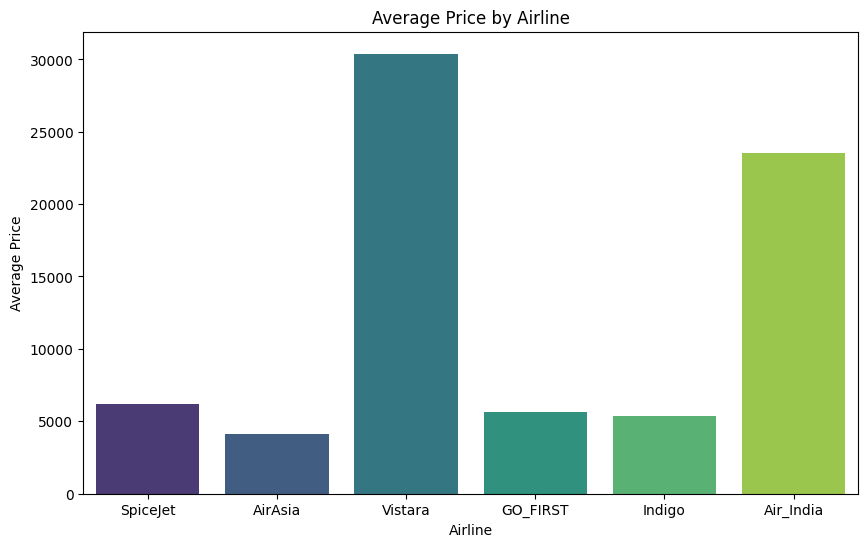

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='airline', y='price', data=df, palette='viridis', ci=None)
plt.title('Average Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.show()

<Axes: >

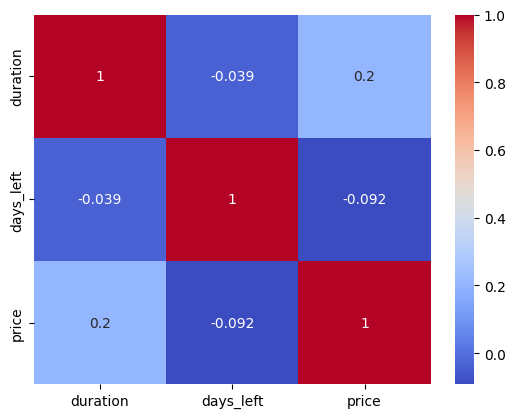

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')



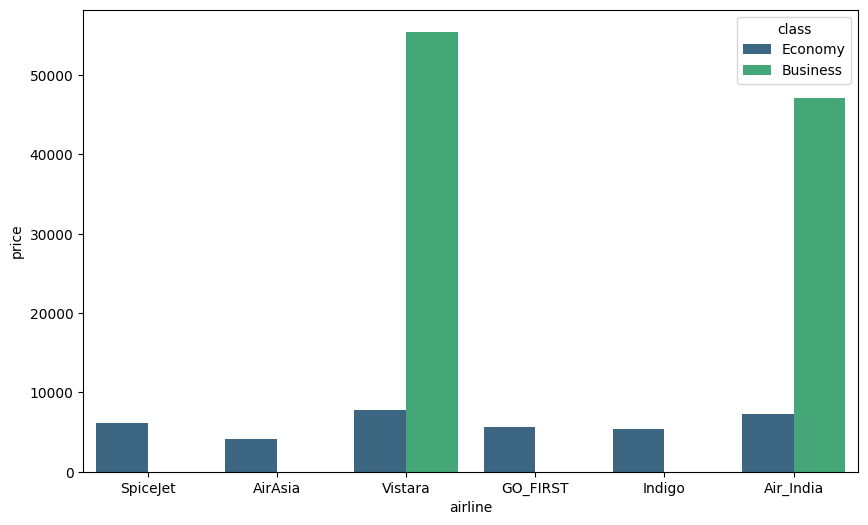

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='airline', y='price', data=df,hue='class' ,palette='viridis', ci=None)
plt.show()

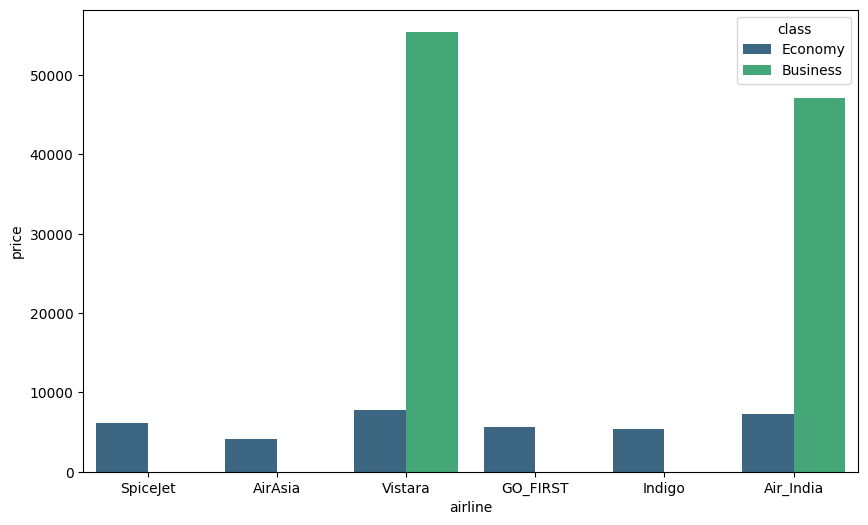

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='airline', y='price', data=df,hue='class' ,palette='viridis', ci=None)
plt.show()

In [ ]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='str')

KeyboardInterrupt: 

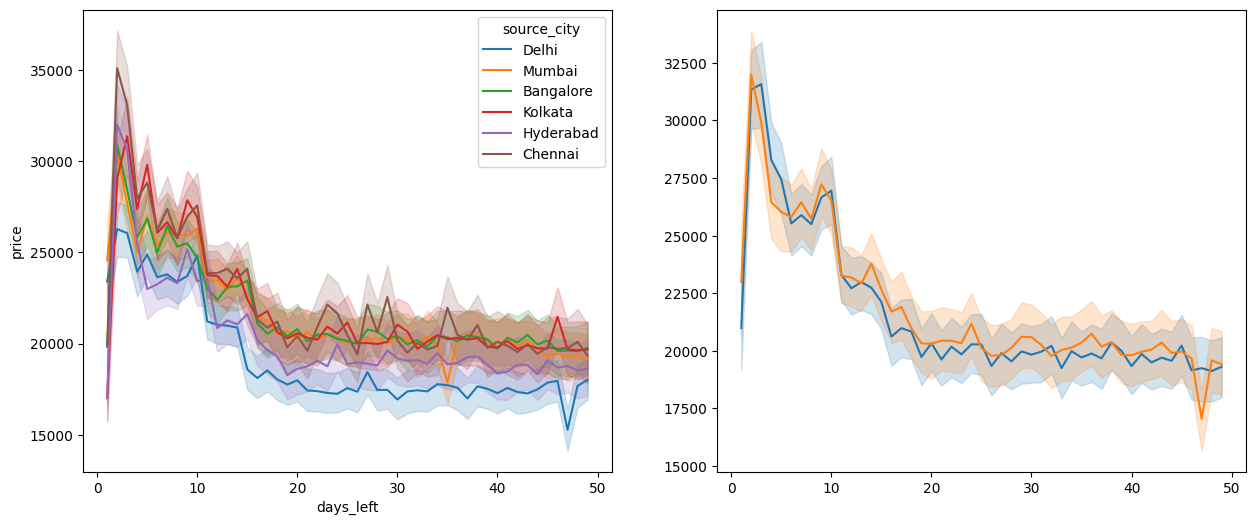

In [ ]:
# fig,ax = plt.subplots(1,2,figsize=(15,6))
# sns.lineplot(x='days_left',y='price',data=df,hue = 'source_city' ,ax=ax[0])
# sns.lineplot(x='days_left',y='price',data=df,hue='destination_city',ax=ax[1])
# plt.show()

In [ ]:
df.columns

NameError: name 'df' is not defined

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'str':
        df[col] = le.fit_transform(df[col])

In [ ]:
df.corr(numeric_only=True)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
airline,1.000000,0.758716,-0.028408,0.056917,-0.029790,0.037771,-0.030202,-0.178866,-0.001777,-0.010659,0.243406
flight,0.758716,1.000000,-0.010922,0.075299,-0.083200,0.056546,-0.046203,-0.234094,0.140003,-0.001117,0.288301
source_city,-0.028408,-0.010922,1.000000,-0.004759,0.003073,0.044727,-0.223366,0.000472,0.007881,-0.003566,0.004147
departure_time,0.056917,0.075299,-0.004759,1.000000,-0.008418,-0.046038,-0.001274,-0.053243,0.084310,-0.001532,0.058218
stops,-0.029790,-0.083200,0.003073,-0.008418,1.000000,0.009438,-0.012523,0.098651,-0.472109,-0.008085,-0.201237
arrival_time,0.037771,0.056546,0.044727,-0.046038,0.009438,1.000000,-0.037467,-0.028042,0.009385,-0.004207,0.042482
destination_city,-0.030202,-0.046203,-0.223366,-0.001274,-0.012523,-0.037467,1.000000,0.001716,0.001516,-0.005056,0.004672
class,-0.178866,-0.234094,0.000472,-0.053243,0.098651,-0.028042,0.001716,1.000000,-0.137506,0.012719,-0.937817
duration,-0.001777,0.140003,0.007881,0.084310,-0.472109,0.009385,0.001516,-0.137506,1.000000,-0.038577,0.202976
days_left,-0.010659,-0.001117,-0.003566,-0.001532,-0.008085,-0.004207,-0.005056,0.012719,-0.038577,1.000000,-0.091609


In [ ]:
y = df['price']
x = df.drop(columns=['price'])
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [ ]:
X_scaled
# add column names back to the scaled data
X_scaled = pd.DataFrame(X_scaled, columns=x.columns)

In [ ]:
X_scaled

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,0.487738,0.783047,-0.330293,-0.238118,2.588928,1.106099,1.381974,0.673441,-1.400414,-1.843498
1,0.487738,0.724057,-0.330293,-0.808109,2.588928,0.532057,1.381974,0.673441,-1.378156,-1.843498
2,-1.692241,0.235280,-0.330293,-0.808109,2.588928,-1.190068,1.381974,0.673441,-1.400414,-1.843498
3,1.032733,1.207215,-0.330293,0.901866,2.588928,-1.764110,1.381974,0.673441,-1.389285,-1.843498
4,1.032733,1.179125,-0.330293,0.901866,2.588928,0.532057,1.381974,0.673441,-1.378156,-1.843498
...,...,...,...,...,...,...,...,...,...,...
299617,1.032733,0.976872,-0.901118,0.901866,-0.425161,-0.616026,0.235777,-1.484910,-0.300009,1.696308
299618,1.032733,0.988108,-0.901118,-1.378101,-0.425161,1.106099,0.235777,-1.484910,-0.252710,1.696308
299619,1.032733,1.002154,-0.901118,-0.808109,-0.425161,1.106099,0.235777,-1.484910,0.221675,1.696308
299620,1.032733,0.993726,-0.901118,-0.808109,-0.425161,-0.616026,0.235777,-1.484910,-0.311138,1.696308


In [ ]:
# vif
from statsmodels.stats.outliers_influence import variance_inflation_factor


def calculate_vif(df):
    columns = df.columns
    vif_data = pd.DataFrame()
    vif_data['feature'] = columns
    vif_data['VIF'] = 0

    for i in range(len(columns)):
        vif_data['VIF'][i] = variance_inflation_factor(df.values, i)

    while vif_data['VIF'].max() > 5:
        max_vif_feature = vif_data.loc[vif_data['VIF'].idxmax(), 'feature']
        print(f"Dropping feature: {max_vif_feature}")
        df = df.drop(columns=[max_vif_feature])
        vif_data = vif_data[vif_data['feature'] != max_vif_feature]
        for i in range(len(vif_data)):
            vif_data['VIF'][i] = variance_inflation_factor(df.values, i)
    return df, vif_data

In [ ]:
X_scaled.info()

<class 'pandas.DataFrame'>
RangeIndex: 299622 entries, 0 to 299621
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           299622 non-null  float64
 1   flight            299622 non-null  float64
 2   source_city       299622 non-null  float64
 3   departure_time    299622 non-null  float64
 4   stops             299622 non-null  float64
 5   arrival_time      299622 non-null  float64
 6   destination_city  299622 non-null  float64
 7   class             299622 non-null  float64
 8   duration          299622 non-null  float64
 9   days_left         299622 non-null  float64
dtypes: float64(10)
memory usage: 22.9 MB


In [ ]:
calculate_vif(X_scaled)

TypeError: Invalid value '2.431595774528262' for dtype 'int64'